In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Inserciones

In [66]:
df_id = pd.read_csv("inserciones_id.csv")
df_usr = pd.read_csv("inserciones_username.csv")
print(df_id.head())
print(df_usr.head())

                         mapa         1         5        10        15  \
0             hashing_abierto  0.475287  2.476666  4.905386  7.649522   
1      hashing_cerrado_lineal  0.443931  2.131019  4.084476  6.185782   
2  hashing_cerrado_cuadratico  0.447539  2.122182  4.131670  6.368437   
3                         stl  0.393205  1.958876  3.889602  6.290481   

          20  
0  10.225273  
1   8.085193  
2   8.372062  
3   7.876883  
                         mapa         1         5        10         15  \
0             hashing_abierto  0.652049  3.236735  6.505092   9.949378   
1      hashing_cerrado_lineal  0.796790  3.774954  7.533889  11.016821   
2  hashing_cerrado_cuadratico  0.839880  3.920199  7.502317  11.358063   
3                         stl  0.422338  1.994260  4.018575   6.115539   

          20  
0  13.569873  
1  14.672821  
2  15.398477  
3   8.144603  


In [68]:
df_id_melted = df_id.melt(id_vars='mapa', var_name='insertions', value_name='time')
df_usr_melted = df_usr.melt(id_vars='mapa', var_name='insertions', value_name='time')

df_id_melted['insertions'] = df_id_melted['insertions'].astype(int)
df_usr_melted['insertions'] = df_usr_melted['insertions'].astype(int)

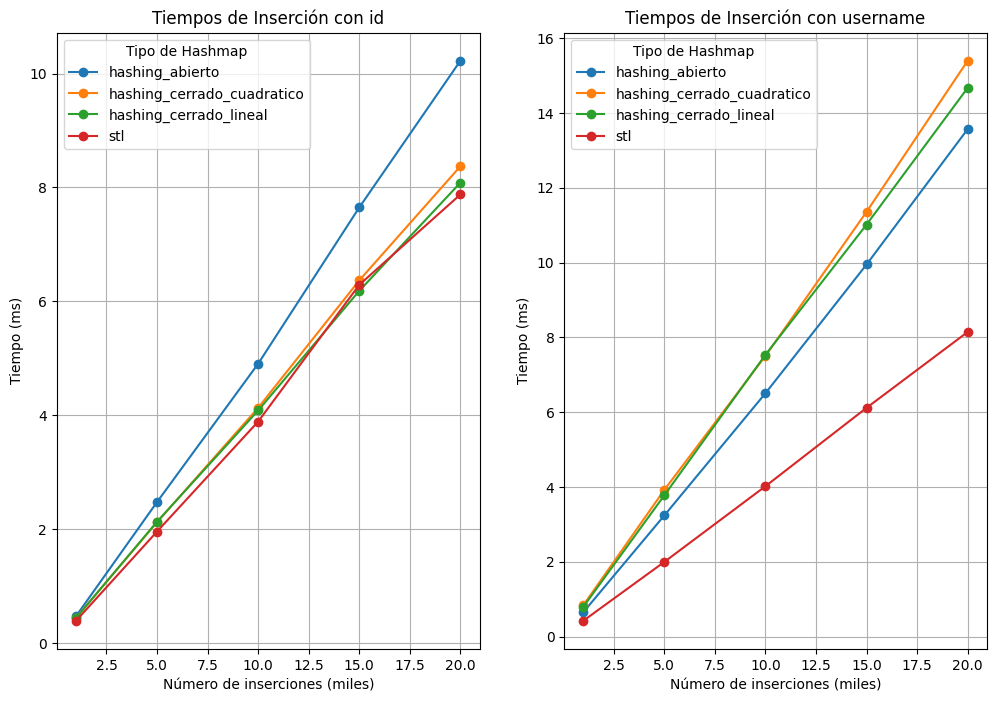

In [91]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,8))

for key, grp in df_id_melted.groupby(["mapa"]):
    axes[0].plot(grp["insertions"], grp["time"], marker='o', label=key[0])
    
for key, grp in df_usr_melted.groupby(["mapa"]):
    axes[1].plot(grp["insertions"], grp["time"], marker='o', label=key[0])

for ax in axes:
    ax.legend(title="Tipo de Hashmap")
    ax.grid(True)
    ax.set(ylabel="Tiempo (ms)", xlabel="Número de inserciones (miles)")

axes[0].set(title="Tiempos de Inserción con Id")
axes[1].set(title="Tiempos de Inserción con Username")

plt.show()


In [59]:
insertion_counts = ["1", "5", "10", "15", "20"]
num_insertion_counts = len(insertion_counts)
num_maps = len(df["mapa"])

# Create a numpy array for the bar positions
bar_width = 0.15
index = np.arange(num_insertion_counts)

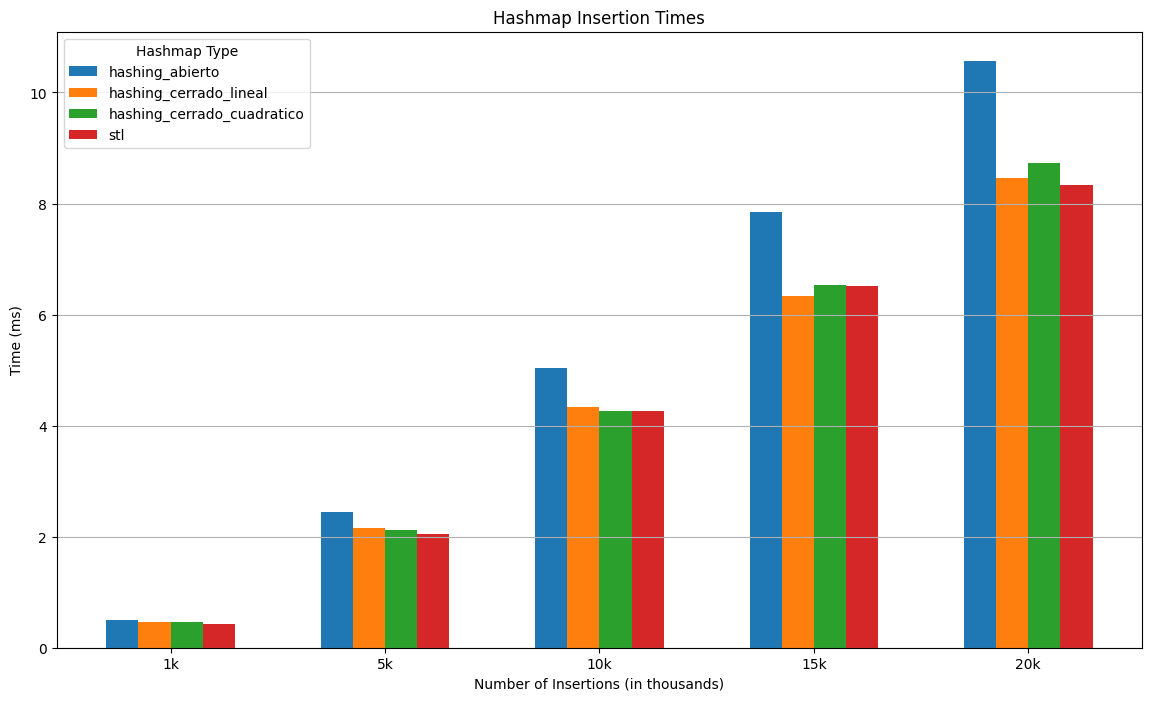

In [60]:
plt.figure(figsize=(14, 8))

for i, map_type in enumerate(df["mapa"]):
    plt.bar(index + i * bar_width, df[insertion_counts].iloc[i], bar_width, label=map_type)

# Customize the plot
plt.xlabel("Number of Insertions (in thousands)")
plt.ylabel("Time (ms)")
plt.title("Hashmap Insertion Times")
plt.xticks(index + bar_width * (num_maps - 1) / 2, ["1k", "5k", "10k", "15k", "20k"])
plt.legend(title="Hashmap Type")
plt.grid(axis="y")

# Display the plot
plt.show()

# Busquedas Tipo 1

In [61]:
df = pd.read_csv("busquedas1.csv")
print(df.head())

                         mapa         1         5        10        15  \
0             hashing_abierto  0.461080  2.376199  4.849725  7.500278   
1      hashing_cerrado_lineal  0.246509  1.133393  2.275928  3.355707   
2  hashing_cerrado_cuadratico  0.352347  1.752943  3.389902  5.026467   
3                         stl  0.161927  0.886586  1.791206  2.857526   

          20  
0  10.377961  
1   4.528428  
2   6.773545  
3   3.742132  


In [62]:
df_melted = df.melt(id_vars="mapa", var_name="busquedas", value_name="tiempo")
print(df_melted.head())
df_melted["busquedas"] = df_melted["busquedas"].astype(int)
print(df_melted.head())

                         mapa busquedas    tiempo
0             hashing_abierto         1  0.461080
1      hashing_cerrado_lineal         1  0.246509
2  hashing_cerrado_cuadratico         1  0.352347
3                         stl         1  0.161927
4             hashing_abierto         5  2.376199
                         mapa  busquedas    tiempo
0             hashing_abierto          1  0.461080
1      hashing_cerrado_lineal          1  0.246509
2  hashing_cerrado_cuadratico          1  0.352347
3                         stl          1  0.161927
4             hashing_abierto          5  2.376199


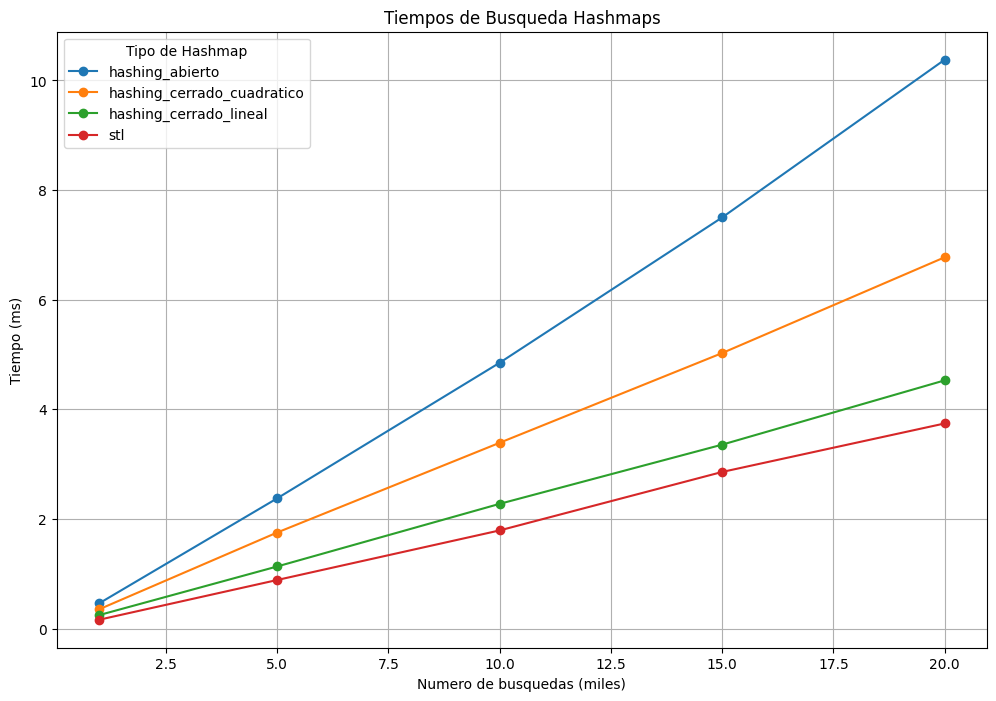

In [63]:
plt.figure(figsize=(12, 8))

for key, grp in df_melted.groupby(["mapa"]):
    plt.plot(grp["busquedas"], grp["tiempo"], marker='o', label=key[0])

plt.xlabel("Numero de busquedas (miles)")
plt.ylabel("Tiempo (ms)")
plt.title("Tiempos de Busqueda Hashmaps")
plt.legend(title="Tipo de Hashmap")
plt.grid(True)
plt.show()
